In [1]:
# Import essential libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visual style for all our plots
sns.set_style("whitegrid")

In [5]:
# Load the dataset from the 'train.csv' file
try:
    df = pd.read_csv('data/train.csv')
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please download it from Kaggle and place it in the correct directory.")
    exit()

# Display the first 5 rows to get a feel for the data
print("--- First 5 Rows of the Dataset ---")
print(df.head())
print("\n" + "="*50 + "\n")

# Get a concise summary of the dataframe, including data types and non-null values
print("--- Dataset Information ---")
df.info()
print("\n" + "="*50 + "\n")

# Get descriptive statistics for numerical columns
print("--- Descriptive Statistics ---")
print(df.describe())

--- First 5 Rows of the Dataset ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0           

In [6]:
# Check the count of missing values in each column
print("--- Missing Values Before Cleaning ---")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Strategy for filling missing values:
# Age: We'll use the median age to fill missing values. The median is less sensitive to outliers than the mean.
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Embarked: This is a categorical feature. We'll fill the 2 missing values with the most common port (the mode)
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

# Cabin: This column has too many missing values (over 77%).
# For this basic analysis, we will drop it
df.drop('Cabin', axis=1, inplace=True)

# Confirm that the missing values have been handled
print("--- Missing Values After Cleaning ---")
print(df.isnull().sum())

--- Missing Values Before Cleaning ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


--- Missing Values After Cleaning ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\RIYA\AppData\Local\Temp\ipykernel_15716\2056517970.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
C:\Users\RIYA\AppData\Local\Temp\ipykernel_15716\2056517970.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

--- Analysis 1: Survival by Gender ---


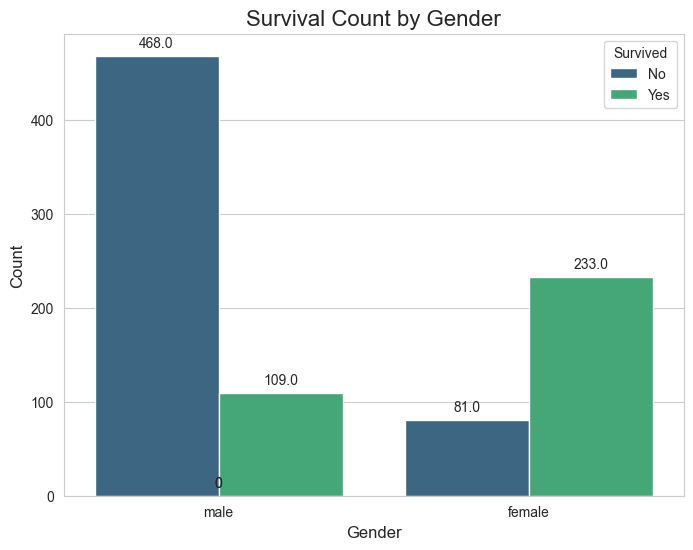

Survival Percentage by Gender:
 Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


--- Analysis 2: Survival by Passenger Class ---


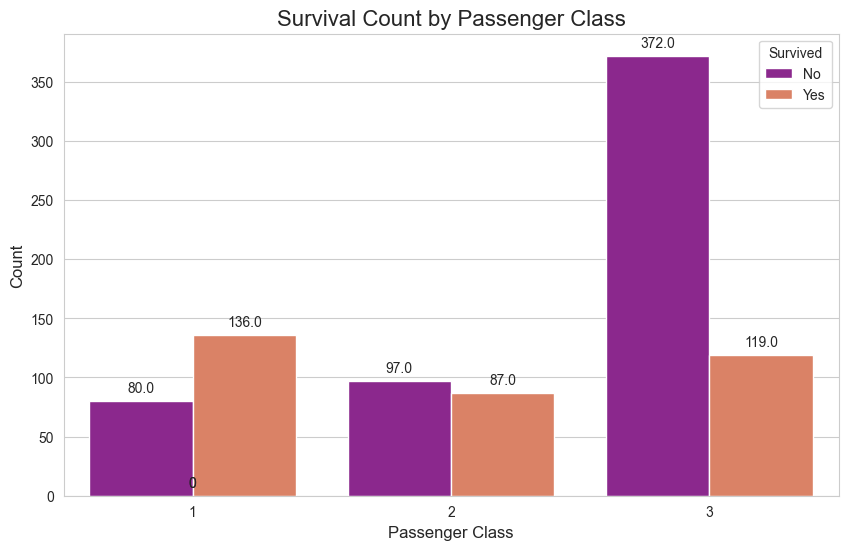

Survival Percentage by Passenger Class:
 Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253


--- Analysis 3: Survival Distribution by Age ---


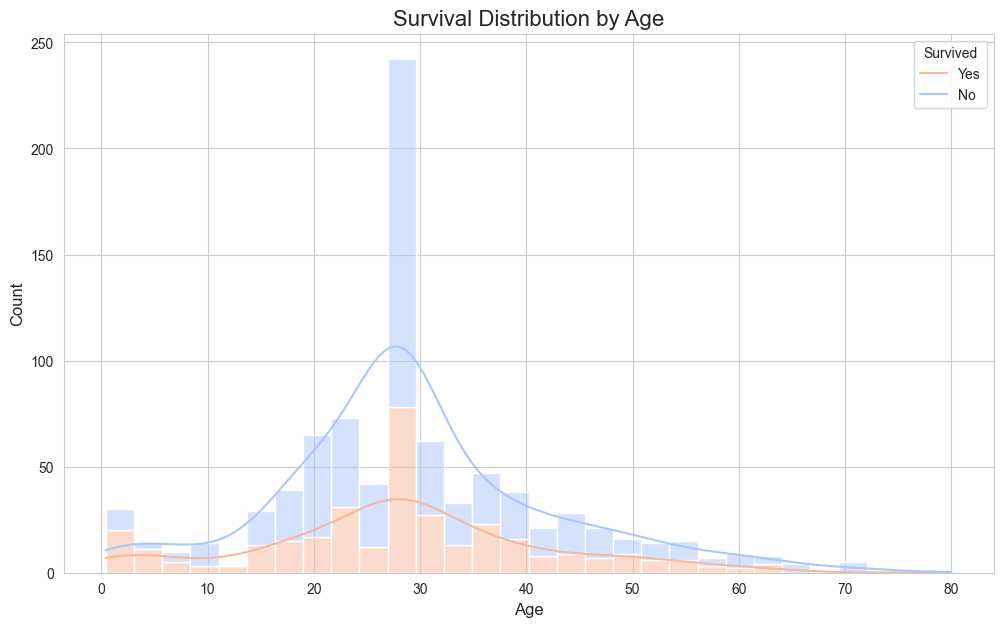

C:\Users\RIYA\AppData\Local\Temp\ipykernel_15716\3402508598.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_survival = df.groupby('AgeGroup')['Survived'].value_counts(normalize=True).unstack() * 100


Survival Percentage by Age Group:
 Survived             0          1
AgeGroup                         
Child        42.647059  57.352941
Teen         51.111111  48.888889
Young Adult  65.561694  34.438306
Adult        58.373206  41.626794
Senior       73.076923  26.923077


--- Analysis 4: Correlation of Numerical Features ---


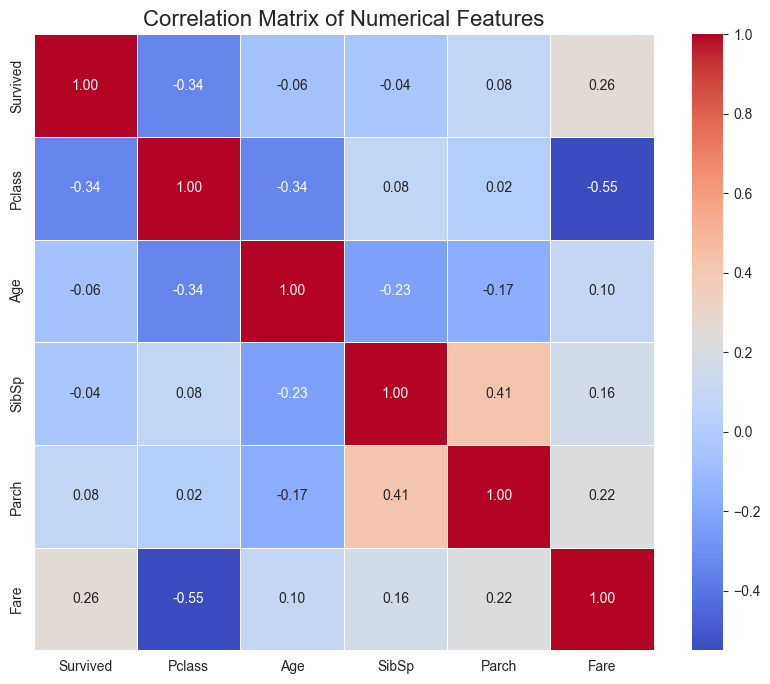

Correlation with Survival:
 Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Pclass     -0.338481
Name: Survived, dtype: float64


--- End of Analysis ---


In [7]:
# EDA and Visualisation
# This is where we answer key questions about the data.

# --- Question 1: What was the survival rate by gender? ---
print("--- Analysis 1: Survival by Gender ---")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sex', hue='Survived', data=df, palette='viridis')
plt.title('Survival Count by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
# Add percentages on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.savefig('gender_survival.png') # Save the plot for your LinkedIn post
plt.show()

# Calculate and print the exact survival percentages
gender_survival = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100
print("Survival Percentage by Gender:\n", gender_survival)
print("\n" + "="*50 + "\n")


# --- Question 2: Did passenger class affect survival? ---
print("--- Analysis 2: Survival by Passenger Class ---")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Pclass', hue='Survived', data=df, palette='plasma')
plt.title('Survival Count by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.savefig('pclass_survival.png')
plt.show()

pclass_survival = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack() * 100
print("Survival Percentage by Passenger Class:\n", pclass_survival)
print("\n" + "="*50 + "\n")


# --- Question 3: How did age influence survival? ---
print("--- Analysis 3: Survival Distribution by Age ---")
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, kde=True, palette='coolwarm')
plt.title('Survival Distribution by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['Yes', 'No']) # Note: Legend order might need adjustment based on plot
plt.savefig('age_survival.png')
plt.show()

# We can also create age groups for a clearer numerical analysis
bins = [0, 12, 18, 35, 60, 81]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
agegroup_survival = df.groupby('AgeGroup')['Survived'].value_counts(normalize=True).unstack() * 100
print("Survival Percentage by Age Group:\n", agegroup_survival)
print("\n" + "="*50 + "\n")


# --- Question 4: How are the numerical features correlated? ---
print("--- Analysis 4: Correlation of Numerical Features ---")
# Select only numerical columns for the correlation matrix
numerical_df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.savefig('correlation_heatmap.png')
plt.show()

print("Correlation with Survival:\n", correlation_matrix['Survived'].sort_values(ascending=False))
print("\n" + "="*50 + "\n")

print("--- End of Analysis ---")

--- Analysis 1: Survival by Gender ---


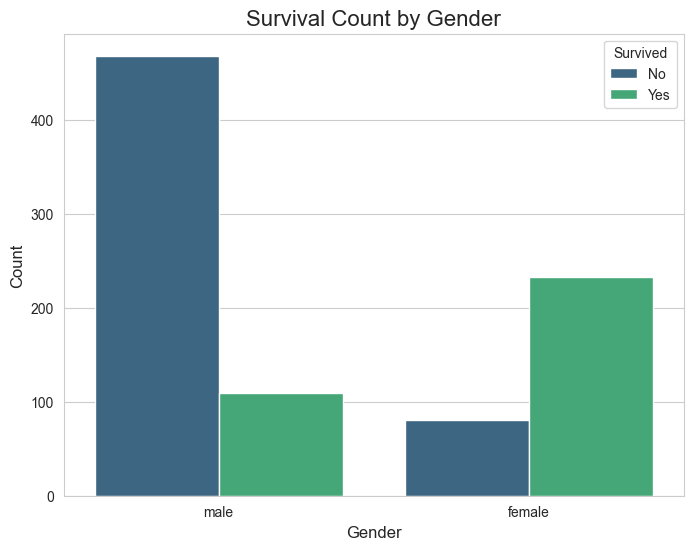

Survival Percentage by Gender:
 Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


--- Analysis 2: Survival by Passenger Class ---


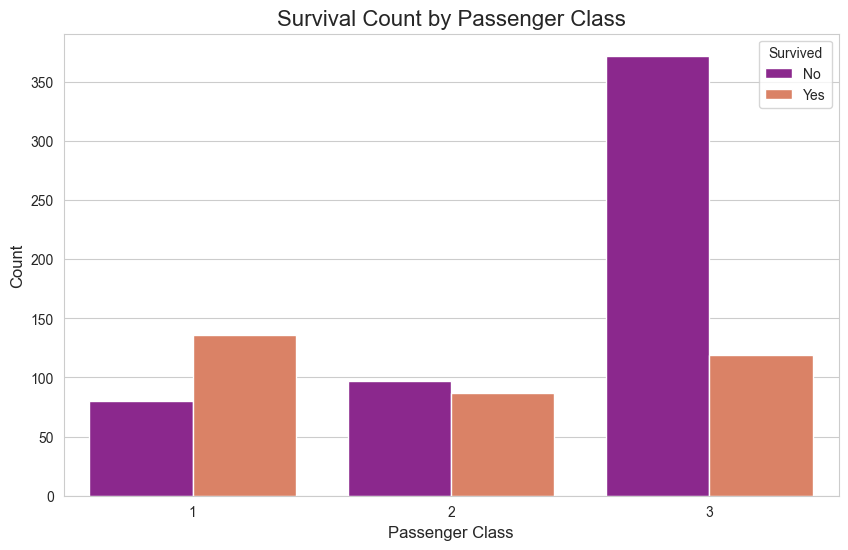

Survival Percentage by Passenger Class:
 Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253


--- Analysis 3: Survival Distribution by Age ---


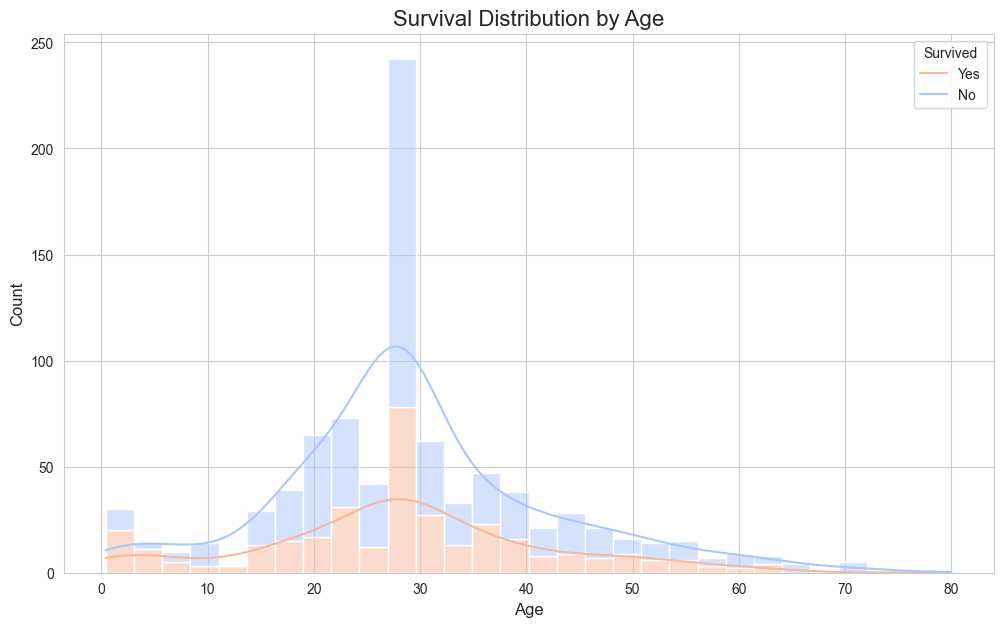

--- Analysis 4: Correlation of Numerical Features ---


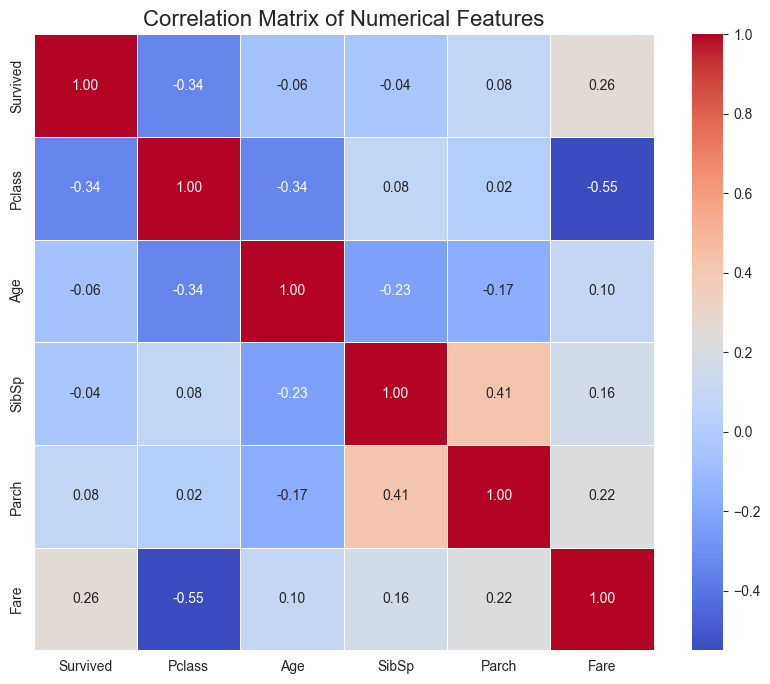

Correlation with Survival:
 Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Pclass     -0.338481
Name: Survived, dtype: float64


--- Analysis 5: Survival by Family Size ---


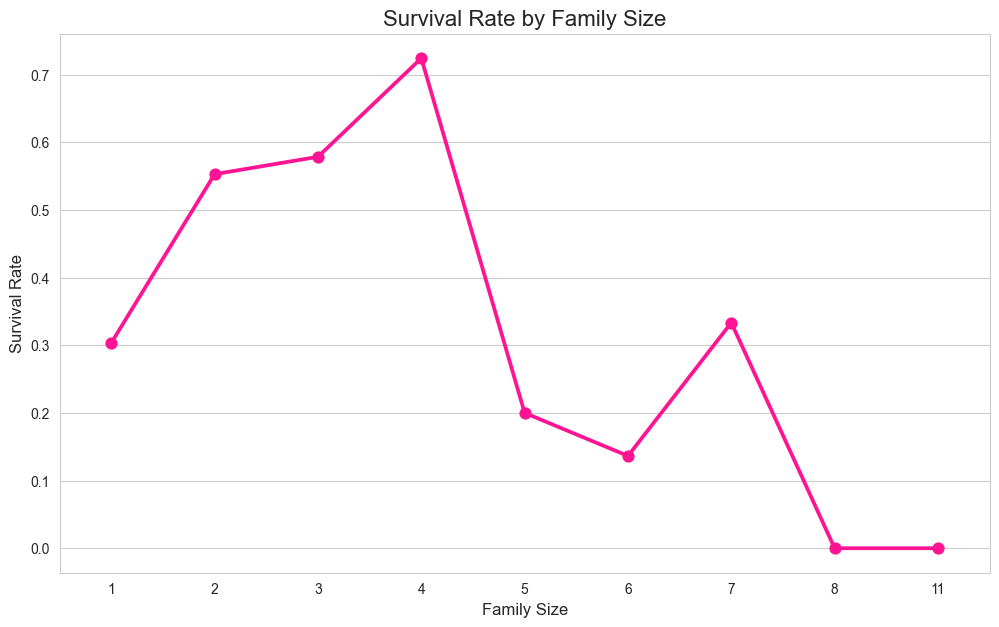

Survival Percentage by Family Size:
 FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64


--- Analysis 6: Survival Distribution by Fare ---


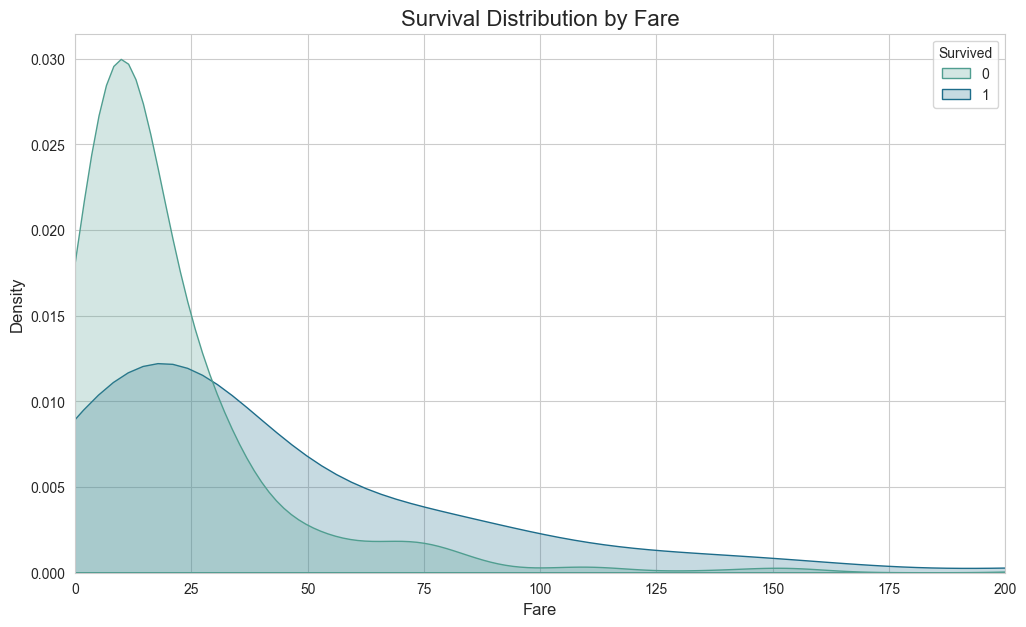

--- Analysis 7: Survival by Port of Embarkation ---


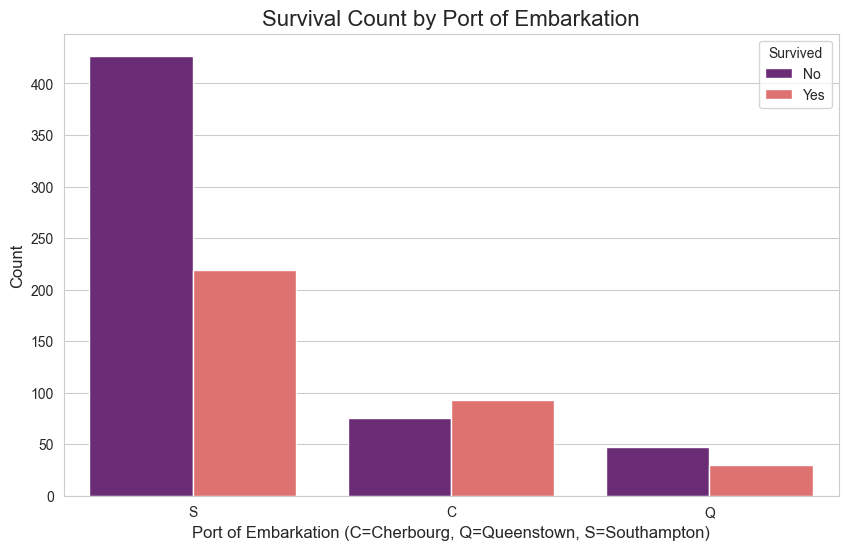

Survival Percentage by Port of Embarkation:
 Survived          0          1
Embarked                      
C         44.642857  55.357143
Q         61.038961  38.961039
S         66.099071  33.900929


--- Analysis 8: Combined Analysis of Class and Gender ---


C:\Users\RIYA\AppData\Local\Temp\ipykernel_15716\1594493562.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='Sex', y='Survived', col='Pclass', data=df, kind='bar', palette='muted', errorbar=None)


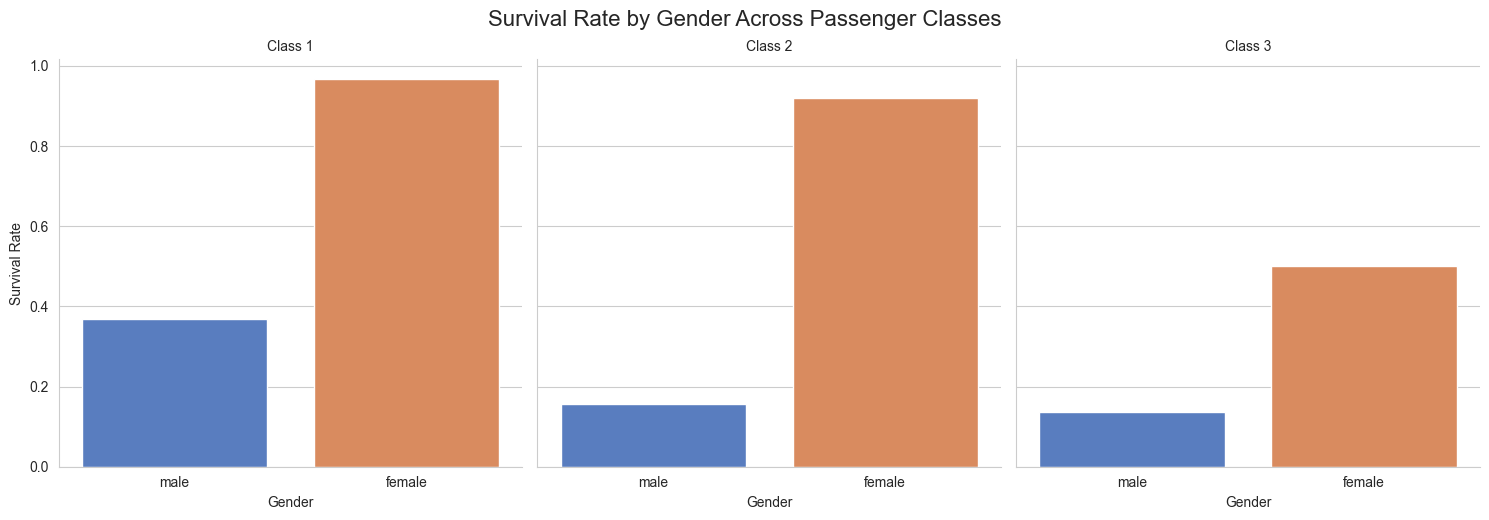

In [8]:
# =============================================================================
# # 4. EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION
# =============================================================================
# This is where we answer key questions about the data.

# --- Question 1: What was the survival rate by gender? ---
print("--- Analysis 1: Survival by Gender ---")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sex', hue='Survived', data=df, palette='viridis')
plt.title('Survival Count by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.savefig('gender_survival.png')
plt.show()

gender_survival = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100
print("Survival Percentage by Gender:\n", gender_survival)
print("\n" + "="*50 + "\n")


# --- Question 2: Did passenger class affect survival? ---
print("--- Analysis 2: Survival by Passenger Class ---")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Pclass', hue='Survived', data=df, palette='plasma')
plt.title('Survival Count by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.savefig('pclass_survival.png')
plt.show()

pclass_survival = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack() * 100
print("Survival Percentage by Passenger Class:\n", pclass_survival)
print("\n" + "="*50 + "\n")


# --- Question 3: How did age influence survival? ---
print("--- Analysis 3: Survival Distribution by Age ---")
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, kde=True, palette='coolwarm')
plt.title('Survival Distribution by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['Yes', 'No'])
plt.savefig('age_survival.png')
plt.show()


# --- Question 4: How are the numerical features correlated? ---
print("--- Analysis 4: Correlation of Numerical Features ---")
numerical_df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.savefig('correlation_heatmap.png')
plt.show()

print("Correlation with Survival:\n", correlation_matrix['Survived'].sort_values(ascending=False))
print("\n" + "="*50 + "\n")

# =============================================================================
# # 5. ADVANCED VISUALIZATIONS AND DEEPER INSIGHTS
# =============================================================================

# --- Question 5: Did traveling alone vs. with family make a difference? ---
print("--- Analysis 5: Survival by Family Size ---")
# Feature Engineering: Create a 'FamilySize' column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

plt.figure(figsize=(12, 7))
# A pointplot is great for showing the relationship between a numerical and categorical variable.
sns.pointplot(x='FamilySize', y='Survived', data=df, errorbar=None, color='deeppink')
plt.title('Survival Rate by Family Size', fontsize=16)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.savefig('familysize_survival.png')
plt.show()

# Insight: People who were alone had a lower survival rate than those in small families.
# However, survival rates dropped dramatically for very large families.
family_survival = df.groupby('FamilySize')['Survived'].mean() * 100
print("Survival Percentage by Family Size:\n", family_survival)
print("\n" + "="*50 + "\n")


# --- Question 6: How did the ticket fare relate to survival? ---
print("--- Analysis 6: Survival Distribution by Fare ---")
plt.figure(figsize=(12, 7))
# A Kernel Density Estimate (KDE) plot is useful for visualizing the distribution of a variable.
sns.kdeplot(data=df, x='Fare', hue='Survived', fill=True, common_norm=False, palette='crest')
plt.title('Survival Distribution by Fare', fontsize=16)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(0, 200) # Limit x-axis to see the main distribution, as some fares are very high
plt.savefig('fare_survival.png')
plt.show()
# Insight: Passengers who paid a higher fare had a higher chance of survival.


# --- Question 7: Did the port of embarkation matter? ---
print("--- Analysis 7: Survival by Port of Embarkation ---")
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='magma')
plt.title('Survival Count by Port of Embarkation', fontsize=16)
plt.xlabel('Port of Embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.savefig('embark_survival.png')
plt.show()

embark_survival = df.groupby('Embarked')['Survived'].value_counts(normalize=True).unstack() * 100
print("Survival Percentage by Port of Embarkation:\n", embark_survival)
# Insight: Passengers who embarked at Cherbourg (C) had a notably higher survival rate.
print("\n" + "="*50 + "\n")


# --- Question 8: How do class and gender interact to affect survival? ---
print("--- Analysis 8: Combined Analysis of Class and Gender ---")
# A catplot is a fantastic tool for creating faceted plots to see relationships across multiple categories.
g = sns.catplot(x='Sex', y='Survived', col='Pclass', data=df, kind='bar', palette='muted', errorbar=None)
g.set_axis_labels("Gender", "Survival Rate")
g.set_titles("Class {col_name}")
plt.suptitle('Survival Rate by Gender Across Passenger Classes', y=1.03, fontsize=16)
plt.savefig('class_gender_survival.png')
plt.show()
# Insight: This plot clearly shows that women in 1st and 2nd class had an almost guaranteed survival (>90%).
# The survival advantage for women was less pronounced in 3rd class. Men in all classes had very low survival rates.